<h2> Transfer Learning - VGG16 + ANN (1 hidden 128 nodes)</h2>
<hr>
<h4> Number of classes - 3 </h4>
<li>Early Blight</li>
<li>Late Blight</li>
<li>Healthy</li>
<hr>
<h4> Total images - 1561/class </h4>
<h4> Validation Split - 0.2</h4>
<h4> Accuracy - 97% </h4>
<h4> Epochs - 5 </h4>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
X = pickle.load(open('/content/drive/MyDrive/Dataset/Potato/Potato_X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Potato/Potato_y.pickle', 'rb'))

In [ ]:
X.shape

(4682, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
del X
del y

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np

<h3>VGG16</h3>

In [ ]:
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [ ]:
# y = y.reshape(4682, 1)

NameError: ignored

In [ ]:
# y.shape

(4682, 1)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

<h3>ANN</h3>

In [ ]:
x = Dense(128, activation='relu', name='fcl')(x)

In [ ]:
x = Dropout(0.3)(x)

In [ ]:
prediction = Dense(3, activation='softmax', name='prediction')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, batch_size=8, epochs=5)

Epoch 1/5
469/469 [==============================] - 41s 65ms/step - loss: 0.3994 - accuracy: 0.8398
Epoch 2/5
469/469 [==============================] - 40s 86ms/step - loss: 0.1676 - accuracy: 0.9348
Epoch 3/5
469/469 [==============================] - 37s 78ms/step - loss: 0.1154 - accuracy: 0.9610
Epoch 4/5
469/469 [==============================] - 37s 79ms/step - loss: 0.1045 - accuracy: 0.9621
Epoch 5/5
469/469 [==============================] - 44s 95ms/step - loss: 0.1000 - accuracy: 0.9626


In [ ]:
del X_train
del y_train

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

30/30 [==============================] - 16s 367ms/step - loss: 0.1446 - accuracy: 0.9434
Test Loss: 0.14460112154483795
Test Accuracy: 0.9434365034103394


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


30/30 [==============================] - 8s 272ms/step
Test Precision: 0.9452031232531511
Test Recall: 0.9427687978549762
Test F1 Score: 0.9431459997388264


30/30 [==============================] - 8s 270ms/step


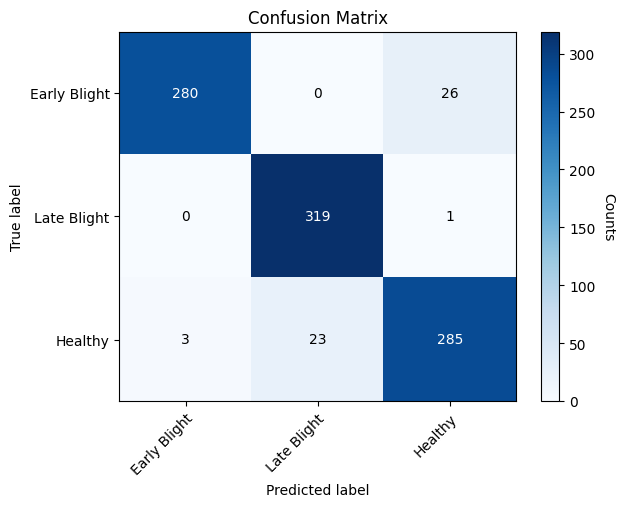

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Early Blight', 'Late Blight', 'Healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
